# Analyze the proportion of artist_type (company) and disabled service

In [1]:
#import sys # never mind these two commands.
#sys.path.append('d:/anaconda/lib/site-packages')
import json
import csv
from collections import Counter  #Import a counting method
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('fringe_2019.json') as json_file:
    fringe_2019 = json.load(json_file)

with open('fringe_2018.json') as json_file:
    fringe_2018 = json.load(json_file)

with open('fringe_2017.json') as json_file:
    fringe_2017 = json.load(json_file)
json_file.close()
fringe_2019[0]['disabled'].keys()
#Cheek the key elements of disable

dict_keys(['audio', 'audio_dates', 'signed', 'signed_dates', 'captioning', 'captioning_dates', 'other_services', 'other_services_dates', 'other_services_information'])

In [3]:
#The number of key elements == true is calculated
def countDisabled(data):
    disabled = {'year': 0,
                'audio': 0,
                'audio_dates': 0,
                'signed': 0,
                'signed_dates': 0,
                'captioning': 0,
                'captioning_dates': 0,
                'other_services': 0,
                'other_services_dates': 0,
                'other_services_information': 0,
                'total': 0,
                'no_services': 0
               }

    for item in data:
        flag = 0
        for k in item['disabled']:
            if item['disabled'][k] == True:
                disabled[k] += 1
                flag = 1
        disabled['total'] += flag

    disabled['no_services'] = len(data) - disabled['total']
    disabled['year'] = data[0]['year']

    return disabled

count_2019 = countDisabled(fringe_2019)
count_2018 = countDisabled(fringe_2018)
count_2017 = countDisabled(fringe_2017)

In [4]:
#Save the calculated number of each element as a CSV file for later use
data = []
data.append(count_2019)
data.append(count_2018)
data.append(count_2017)

with open('disabled2019.csv','w',newline='',encoding='utf-8')as f:
    fieldname = list(count_2019.keys())
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in data:
        writer.writerow(i)
with open('disabled2018.csv','w',newline='',encoding='utf-8')as f:
    fieldname = list(count_2018.keys())
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in data:
        writer.writerow(i)
with open('disabled2017.csv','w',newline='',encoding='utf-8')as f:
    fieldname = list(count_2017.keys())
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in data:
        writer.writerow(i)

# Deeper analysis of activities that provide accessible services each year
First of all, find out all of the activities that provide accessible services each year.

In [5]:
def recordDisabled(data):
    record = []
    for item in data:
        for k in item['disabled']:
            if item['disabled'][k] == True:
                record.append(item)
                break
    return record

disabled_2019 = recordDisabled(fringe_2019)
disabled_2018 = recordDisabled(fringe_2018)
disabled_2017 = recordDisabled(fringe_2017)

In [6]:
#1. Find out the companies of these activities.
def countCompany(data):
    company = []
    count = []
    for item in data:
        company.append(item['artist_type'])

    count = dict(Counter(company))
    count['year'] = data[0]['year']
    
    return count

company_2019 = countCompany(disabled_2019)
company_2018 = countCompany(disabled_2018)
company_2017 = countCompany(disabled_2017)

In [7]:
data = []
data.append(company_2019)
data.append(company_2018)
data.append(company_2017)
len(data)

3

In [8]:
#put all the data for the last three years in one table
disabled_company = pd.DataFrame(data)
disabled_company

,Amateur Company,Professional company,Semi-professional company,Student/Youth company,year
0,10,167,23,9,2019
1,11,129,21,4,2018
2,2,100,10,7,2017


In [9]:
fieldname = []
for item in data:
    fieldname += list(item.keys())
fieldname = list(Counter(fieldname))

for item in data:
    for i in range(0, len(fieldname)):
        if fieldname[i] not in item.keys():
            item[fieldname[i]] = 0

with open('disabled_company.csv','w',newline='',encoding='utf-8')as f:
    writer = csv.DictWriter(f,fieldnames=fieldname)
    writer.writeheader()
    for i in data:
        writer.writerow(i)

In [10]:
#Make a table according to the annual companies and services，That will show cross-data between the company and the service
def servicesInCompany(data):
    company = []
    services_company = {}
    
    for item in data:
        company.append(item['artist_type'])

    company = list(set(company))
    services_company = dict.fromkeys(tuple(company))
    
    for k in services_company.keys():
        services_company[k] = {'audio': 0,
                              'signed': 0,
                              'captioning': 0,
                              'other_services': 0,
                             }
    
    for item in data:
        temp_comp = item['artist_type']
        for service in item['disabled']:
            if item['disabled'][service]==True:
                services_company[temp_comp][service] += 1
    
    return services_company

In [11]:
services_2019 = servicesInCompany(disabled_2019)
services_2018 = servicesInCompany(disabled_2018)
services_2017 = servicesInCompany(disabled_2017)

In [12]:
servicesC_2019 = pd.DataFrame(services_2019)
servicesC_2019.to_csv('servicesCompany_2019.csv')
servicesC_2018 = pd.DataFrame(services_2018)
servicesC_2018.to_csv('servicesCompany_2018.csv')
servicesC_2017 = pd.DataFrame(services_2017)
servicesC_2017.to_csv('servicesCompany_2017.csv')

In [13]:
servicesC_2019 #Generate a two-dimensional table with company type on the X axis and service type on the Y axis

,Professional company,Student/Youth company,Amateur Company,Semi-professional company
audio,11,1,0,1
signed,65,0,2,2
captioning,74,2,2,10
other_services,58,7,7,12


The data should be viewed from the perspective of the company, because there are a large number of professional companies, so it is not fair if the companies compare with each other. So we're going to calculate in the last 3 years what percentage of the company supports various services.

I plan to use a pie chart in the final presentation

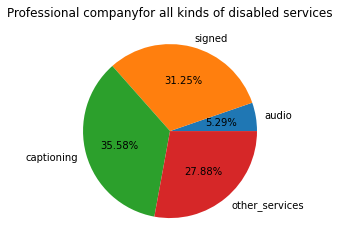

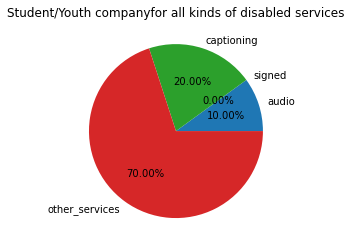

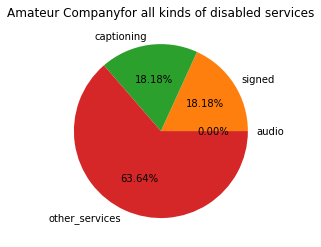

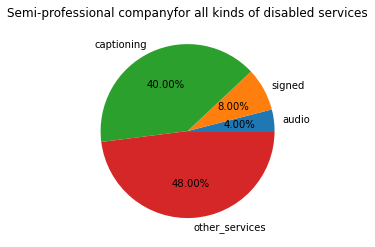

In [15]:
labels=['audio','signed','captioning','other_services']
for i in servicesC_2019.columns:
    X=servicesC_2019[i]
    ig = plt.figure()
    plt.pie(X,labels=labels,autopct='%1.2f%%') 
    plt.title(i+'for all kinds of disabled services')
    plt.show()  

The picture above shows the proportion of various services in the company.
Professional companies are more comprehensive, can cover a variety of services.
Most companies do a good job of including other services.
This gives us a hint about certain types of companies that you can go to if you want to find a company that can serve disabled.
And the one that needs the most attention is Audio, which is supported by very few companies. Accessibility could be helped if such services could be strengthened in the future.